# Análisis de Desempeño en Cursos Introductorios de Matemática
---

In [1]:
# Importar librerias para el análisis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

**IMPORTANTE**: definir adecuadamente la ubicación del archivo `Mate_PI_full_clean.csv` .

In [2]:
# Definir ubicación de archivos
# En Linux/Mac:
# path = r"~/Desktop/Mate_PI/files/"
# En Windows:
path = r"~\OneDrive\Escritorio\Mate_PI\files\\"

mate_pi = pd.read_csv(path + "Mate_PI_full_clean.csv", index_col=0, dtype={"Condicion":"category", "Tipo_Cursada":"category"})

# Orden de categorías para Condicion
mate_pi["Condicion"] = mate_pi["Condicion"].cat.set_categories(
                            ["Libre", "Abandonó", "Desaprobado", "Promocionado"],
                            ordered = True)

# Colores para categoría Condicion
colores_cond=["#7f7f7f", "#ff7f0e", "#d62728", "#2ca02c"]

# Colores en diccionario, para usar cuando no estén todas las categorías presentes:
colores_cond_dict = {
    "Libre" : "#7f7f7f",
    "Abandonó" : "#ff7f0e",
    "Desaprobado" : "#d62728",
    "Promocionado" : "#2ca02c"
}

# Orden de categorías para Tipo_Cursada
mate_pi["Tipo_Cursada"] = mate_pi["Tipo_Cursada"].cat.set_categories(
                            ["Verano", "1er Semestre", "Anticipada"],
                            ordered = True)

# Análisis exploratorio de los datos

**Breve descripción del dataset**

Cada registro es único, corresponde a los resultados de cada alumno, identificados por el índice de fila. No se consignan datos personales, podría haber alumnos que cursaran más de una vez, pero no disponemos de esa información.

- **1P1F**: nota del Primer Parcial, Primera Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **1P2F**: nota del Primer Parcial, Segunda Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **2P1F**: nota del Segundo Parcial, Primera Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **2P2F**: nota del Segundo Parcial, Segunda Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.

La nota mínima para aprobar cada parcial es 4, la materia se promociona con un promedio mayor o igual a 6. 

- **F1**: nota del Flotante de Primer Parcial. Esta fecha permite recuperar el Primer Parcial si ya se logró aprobar el Segundo en las instancias anteriores. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **F2**: nota del Flotante de Segundo Parcial. Esta fecha permite recuperar el Segundo Parcial si ya se logró aprobar el Primero en las instancias anteriores. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **Condicion**: columna categórica, indica la condición final del alumno luego de los parciales.
    -  *Libre*: no se presentó a ningún parcial.
    -  *Abandonó*: rindió algún parcial pero no agotó las instancias posibles.
    -  *Desaprobado*: no logró aprobar Primer Parcial y Segundo Parcial luego de agotar las instancias posibles, o sí lo hizo pero no logró alcanzar el promedio de Promoción.
    -  *Promocionado*: aprobó ambos parciales con un promedio mayor o igual a 6.
- **Final**: nota final de los alumnos promocionados. Valores `int` entre 6 y 10; si no promociona se asigna 0.
- **Año**: año de la cursada. Valores `int` iniciando en 2020.
- **Tipo_Cursada**: columna categórica, indica el período en el que se realizó la cursada.
    - *Verano*: cursada intensiva de Enero-Febrero.
    - *1er Semestre*: cursada regular de Marzo-Junio.
    - *Anticipada*: cursada regular de Agosto-Noviembre.
- **Virtual**: indica si la cursada fue dictada en modalidad virtual o no. Valores `int`, asigna 1 si fue virtual y 0 si no lo fue.
- **Oral**: columna binaria. En las cursadas virtuales, además de aprobar los parciales, se requería aprobar un examen oral. Esta columna indica los resultados como *Aprobado* o *Desaprobado*, la celda está vacía si el alumno no se presentó.
- **Grupo**: columna nominal, indica nombre de la comisión de la que se extrajeron los datos. Presenta los valores *G1* y *G7* para los registros correspondientes a *1er Semestre 2022*. En los otros casos no se consigna distinción por comisiones (comisión única), la celda está vacía.

**NOTA: para la comisión del Verano 2020 no se registraron las notas de los alumnos Desaprobados**. Todas las columnas de Parciales están completadas con el valor 0, y las columnas de Flotantes están completadas con el valor -1.

In [3]:
# Vista inicial del dataset
mate_pi.head()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
0,0.0,0.0,0.0,0.0,-1.0,-1.0,Desaprobado,0,2020,Verano,0,NaN,NaN
1,-1.0,7.0,8.2,-1.0,-1.0,-1.0,Promocionado,8,2020,Verano,0,NaN,NaN
2,0.0,0.0,0.0,0.0,-1.0,-1.0,Desaprobado,0,2020,Verano,0,NaN,NaN
3,0.0,0.0,0.0,0.0,-1.0,-1.0,Desaprobado,0,2020,Verano,0,NaN,NaN
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Libre,0,2020,Verano,0,NaN,NaN


In [4]:
# Descripción general del dataset
mate_pi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 0 to 1222
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   1P1F          1222 non-null   float64 
 1   1P2F          1222 non-null   float64 
 2   2P1F          1222 non-null   float64 
 3   2P2F          1222 non-null   float64 
 4   F1            1222 non-null   float64 
 5   F2            1222 non-null   float64 
 6   Condicion     1222 non-null   category
 7   Final         1222 non-null   int64   
 8   Año           1222 non-null   int64   
 9   Tipo_Cursada  1222 non-null   category
 10  Virtual       1222 non-null   int64   
 11  Oral          89 non-null     object  
 12  Grupo         214 non-null    object  
dtypes: category(2), float64(6), int64(3), object(2)
memory usage: 117.3+ KB


In [5]:
# Años de los cursos registrados
mate_pi["Año"].unique()

array([2020, 2021, 2022, 2023, 2024, 2025])

## Distribución de datos por categorías: Año, Tipo de Cursada, Condición

Además de las notas obtenidas por cada estudiante, identificamos las siguientes categorías de interés:

- `Condicion`: si el alumno resultó Promocionado, Desaprobado o Libre.
- `Año`: en qué año realizó la cursada, entre 2020 y 2025
- `Tipo_Cursada`: si cursó en modalidad Verano, 1er Semestre o Anticipada.

Vamos a revisar la distribución de los datos según estas categorías.

### Distribución de datos por Año y por Cursada

Nos interesa analizar **cuántos alumnos (en promedio) se inscriben en cada modalidad cada año**.

Para ello, analicemos la distribución de los datos y calculemos el promedio buscado.

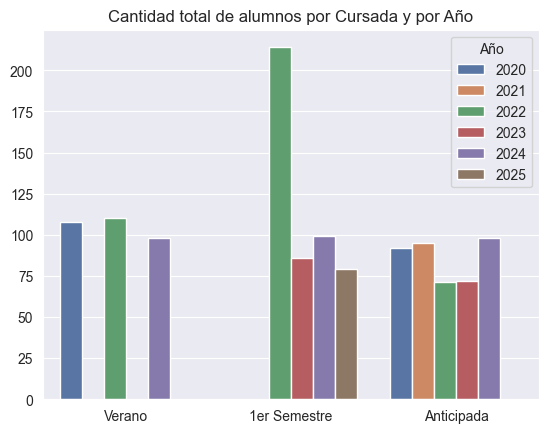

In [6]:
# Cantidad de alumnos por Año y Cursada
sns.countplot(
    data=mate_pi,
    x="Tipo_Cursada",
    hue="Año",
    palette="deep"
)
plt.title("Cantidad total de alumnos por Cursada y por Año")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [7]:
# Creo una tabla para visualizar cantidad de alumnos por Cursada cada año
tabla_alumnos = pd.crosstab(mate_pi["Año"], mate_pi["Tipo_Cursada"], margins=True, margins_name="Total")
tabla_alumnos

Tipo_Cursada,Verano,1er Semestre,Anticipada,Total
Año,,,,
2020,108,0,92,200
2021,0,0,95,95
2022,110,214,71,395
2023,0,86,72,158
2024,98,99,98,295
2025,0,79,0,79
Total,316,478,428,1222


In [8]:
# Calculo cantidad anual promedio de alumnos promocionados por Cursada:
# Voy a rehacer la tabla para que no contenga las sumas parciales:
tabla_alumnos = pd.crosstab(mate_pi["Año"], mate_pi["Tipo_Cursada"], margins=False)
tabla_alumnos.replace(0, np.nan).mean()

Tipo_Cursada
Verano          105.333333
1er Semestre    119.500000
Anticipada       85.600000
dtype: float64

----------

Notamos que:

- **Faltan registros de los cursos: 1er Semestre 2020 y 2021, Verano 2021, 2023 y 2025.**
- La cantidad de registros correspondientes a 1er Semestre y Anticipada son similares.
- **En el 1er Semestre 2022 se tienen valores muy alejados del promedio**. Esto se debe a que en la base de datos hay dos comisiones distintas para ese curso: G7 y G12. 

**Tomaremos como valor representativo de 1er Semestre 2022 al promedio de las dos comisiones**, en este caso, 107 alumnos.

In [9]:
# Corrijo la tabla de cantidad de alumnos con el promedio para 1er Semestre 2022.
tabla_alumnos.loc[2022, "1er Semestre"] = 214/2

tabla_alumnos

Tipo_Cursada,Verano,1er Semestre,Anticipada
Año,,,
2020,108,0,92
2021,0,0,95
2022,110,107,71
2023,0,86,72
2024,98,99,98
2025,0,79,0


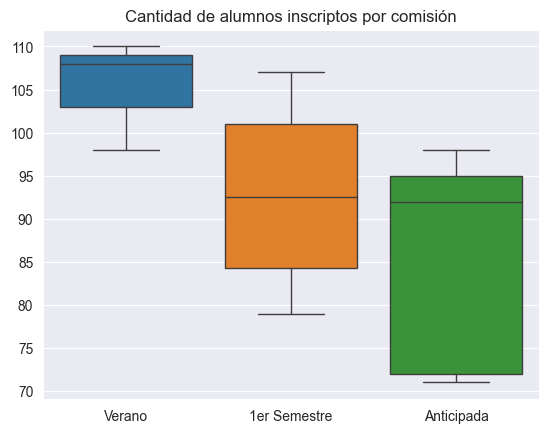

In [10]:
# Visualizo la cantidad de alumnos por Tipo de Cursada, con la tabla corregida:
sns.boxplot(data=tabla_alumnos.replace(0, np.nan))
plt.title("Cantidad de alumnos inscriptos por comisión")
plt.xlabel("")
plt.show()

In [11]:
# Calculo promedios, mediana, desviación estándar
tabla_alumnos.replace(0,np.nan).agg(["mean", "std", "median"])

Tipo_Cursada,Verano,1er Semestre,Anticipada
mean,105.333333,92.750000,85.600000
std,6.429101,12.606215,13.049904
median,108.000000,92.500000,92.000000


Podemos notar que, si bien la Anticipada muestra una mayor dispersión, la mediana de inscriptos anuales es similar a la del 1er Semestre. Ambos cursos se dictan durante el año. **La opción predilecta de cursada es la modalidad Verano**, un curso intensivo que se dicta entre enero y febrero, y **que presenta un promedio de 105 inscriptos por comisión**. 

### Distribución de datos por Condición

Nos interesa analizar **qué proporción de alumnos inscriptos logra Promocionar, son Desaprobados o quedan Libres**. A su vez, podemos desglosar el desempeño según cursada y estudiar esa distribución.

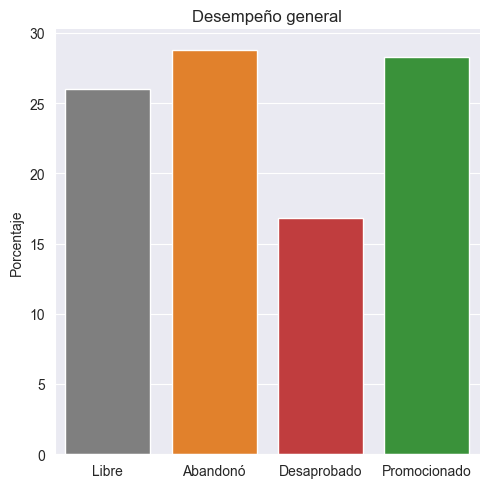

In [12]:
# Realizo un gráfico de distribución segun Condicion
sns.catplot(
    data=mate_pi,
    x="Condicion",
    hue="Condicion",
    kind="count",
    palette=colores_cond,
#    alpha=0.8,
    stat="percent"
)
plt.title("Desempeño general")
plt.ylabel("Porcentaje")
plt.xlabel("")
plt.show()

In [27]:
# Construyo una tabla con los resultados del gráfico:
mate_pi[["Condicion"]].value_counts(normalize=True).round(3) *100

Condicion   
Abandonó        28.8
Promocionado    28.3
Libre           26.0
Desaprobado     16.9
Name: proportion, dtype: float64

Sobre el total de la base de datos, encontramos que:

- **el 28% de los alumnos Promocionaron**: lograron aprobar la materia
- **el 26% de los alumnos quedó Libre**: no rindieron ningún parcial
- **el 29% de los alumnos Abandonó**: no agotaron las instancias de parciales
- **el 17% de los alumnos Desaprobó**: no lograron aprobar la materia luego de rendir todas las instancias.

----------

También podemos analizar la evolución del **desempeño global de los estudiantes en cada año**:

In [14]:
# Creo cada columna de la tabla manualmente:
# Dataframe: cantidad de alumnos por año
cant_por_ano = pd.DataFrame(data=mate_pi["Año"].value_counts().sort_index())
cant_por_ano.rename(columns={"count":"Cant. de alumnos"}, inplace=True)


# DataFrame: Cantidad de Promo., Libre, Desap. Abandono
tabla = pd.crosstab(mate_pi["Año"], mate_pi["Condicion"]).reset_index()

# DataFrame: merge de columna "Cant. de alumnos" en tabla
tabla = tabla.merge(
    right=cant_por_ano,
    how="left",
    left_on="Año",
    right_index=True
)

# Convierto los conteos en porcentajes:
for col in ["Libre", "Abandonó", "Desaprobado", "Promocionado"]:
    tabla[col] = tabla[col].astype("float")    # Asigno tipo de dato adecuado 
    tabla.loc[:, col] = (tabla.loc[:, col] / tabla.loc[:, "Cant. de alumnos"]) * 100
    tabla[col] = tabla[col].round(2)

# Calculo promedios de promocionados por año:
prom_por_ano = pd.DataFrame(data=mate_pi.replace(0, np.nan).groupby("Año")["Final"].mean().sort_index())

# Agrego columna de promedios en tabla
tabla = tabla.merge(
    right=prom_por_ano,
    how="left",
    left_on="Año",
    right_index=True
)

# Modifico nombre de columnas:
new_cols = {
    "Libre" : "Libre (%)",
    "Abandonó" : "Abandonó (%)",
    "Desaprobado" : "Desaprobado (%)",
    "Promocionado" : "Promocionado (%)",
    "Final" : "Nota Promedio"
}
tabla = tabla.rename( columns = new_cols )
tabla["Nota Promedio"] = tabla["Nota Promedio"].round(2)

In [15]:
# Visualizo los resultados como tabla
tabla

,Año,Libre (%),Abandonó (%),Desaprobado (%),Promocionado (%),Cant. de alumnos,Nota Promedio
0,2020,17.50,23.00,13.50,46.00,200,7.72
1,2021,30.53,27.37,17.89,24.21,95,7.48
2,2022,32.91,28.86,15.44,22.78,395,6.93
3,2023,29.75,34.18,18.99,17.09,158,6.85
4,2024,21.02,29.15,18.98,30.85,295,7.33
5,2025,18.99,32.91,18.99,29.11,79,6.61


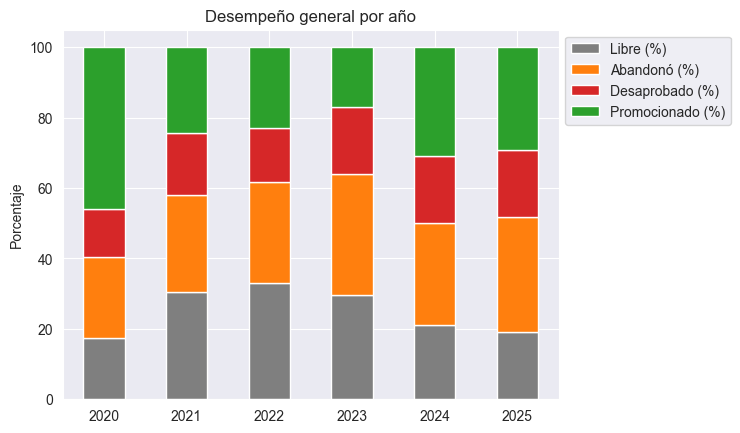

In [16]:
# Visualizo los resultados como gráfica
tabla.drop(columns=["Cant. de alumnos", "Nota Promedio"]).plot(x="Año",
                                                               kind="bar",
                                                               stacked=True,
                                                               color=colores_cond )
plt.legend(bbox_to_anchor=(1,1))
plt.title("Desempeño general por año")
plt.ylabel("Porcentaje")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

In [17]:
# Reporto promedios y desviacion estandar de cada columna:
columnas = ["Libre (%)", "Abandonó (%)", "Desaprobado (%)", "Promocionado (%)", "Nota Promedio"]
tabla[columnas].apply([np.mean, np.std])

,Libre (%),Abandonó (%),Desaprobado (%),Promocionado (%),Nota Promedio
mean,25.116667,29.245000,17.298333,28.340000,7.153333
std,6.107923,3.661952,2.112750,9.067355,0.386465


Podemos extraer **algunas conclusiones respecto al desempeño global de los estudiantes cada año**:

- **Los promocionados obtienen en promedio una nota de 7**, con una dispersión pequeña respecto al promedio, reportando una desviación estándar de 0.39.
- De manera similar, la cantidad de Desaprobados y de Abandonó también se encuentran concentradas en torno a sus valores promedio de 17% y 29% respectivamente.
- **Los porcentajes de Promocionado y Libre muestran las mayores dispersiones**, observando desviaciones estándar de 9.07 y 6.11 respectivamente.

Será interesante analizar si esas **variaciones en porcentajes de Promocionado y Libre responden a alguna tendencia particular en el tiempo**:

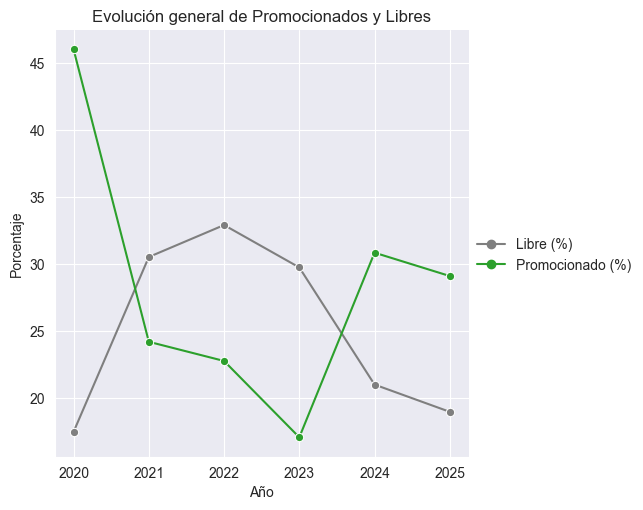

In [18]:
# Realizo un gráfico para mostrar la evolución de Promocionados y Libres en el tiempo
subset_table = tabla[["Año", "Libre (%)", "Promocionado (%)"]].set_index("Año")
sns.relplot( subset_table, 
             kind="line", 
             marker="o",
             palette=[colores_cond_dict["Libre"], colores_cond_dict["Promocionado"]], 
             dashes=False )
plt.ylabel("Porcentaje")
plt.title("Evolución general de Promocionados y Libres")
plt.show()

Si bien no puede observarse una tendencia clara para los datos presentes, cabe destacar la correlación entre variaciones de Promocionados y variaciones de Libres: **a mayor proporción de Libres, menor cantidad de Promocionados y viceversa**. Siendo que los alumnos libres son los que abandonaron la materia sin presentarse a rendir ningún parcial, se evidencia que **fomentar la retención de los alumnos se condice con mejores índices de aprobación**, al menos para la muestra considerada en este estudio. 
    

### Desempeño de cada curso registrado cada año

Si bien ya vimos que faltan algunos cursos por registrar, podemos condensar **todos los resultados obtenidos en cada uno de los cursos presentes en la base de datos en un gráfico completo**:

In [19]:
# Creo una funcion para filtrar los datos por Año, Tipo_Cursada
def filtered_data(data, año, tipo_cursada):
    """

    Parameters
    ----------
    data : pandas DataFrame
    año : integer
        Year to filter, from 2020 to 2025
    tipo_cursada : string
        Options: Verano, Anticipada, 1er Semestre
        
    Returns
    -------
    pandas DataFrame

    """
    return data[ (data["Año"] == año) & (data["Tipo_Cursada"] == tipo_cursada)]

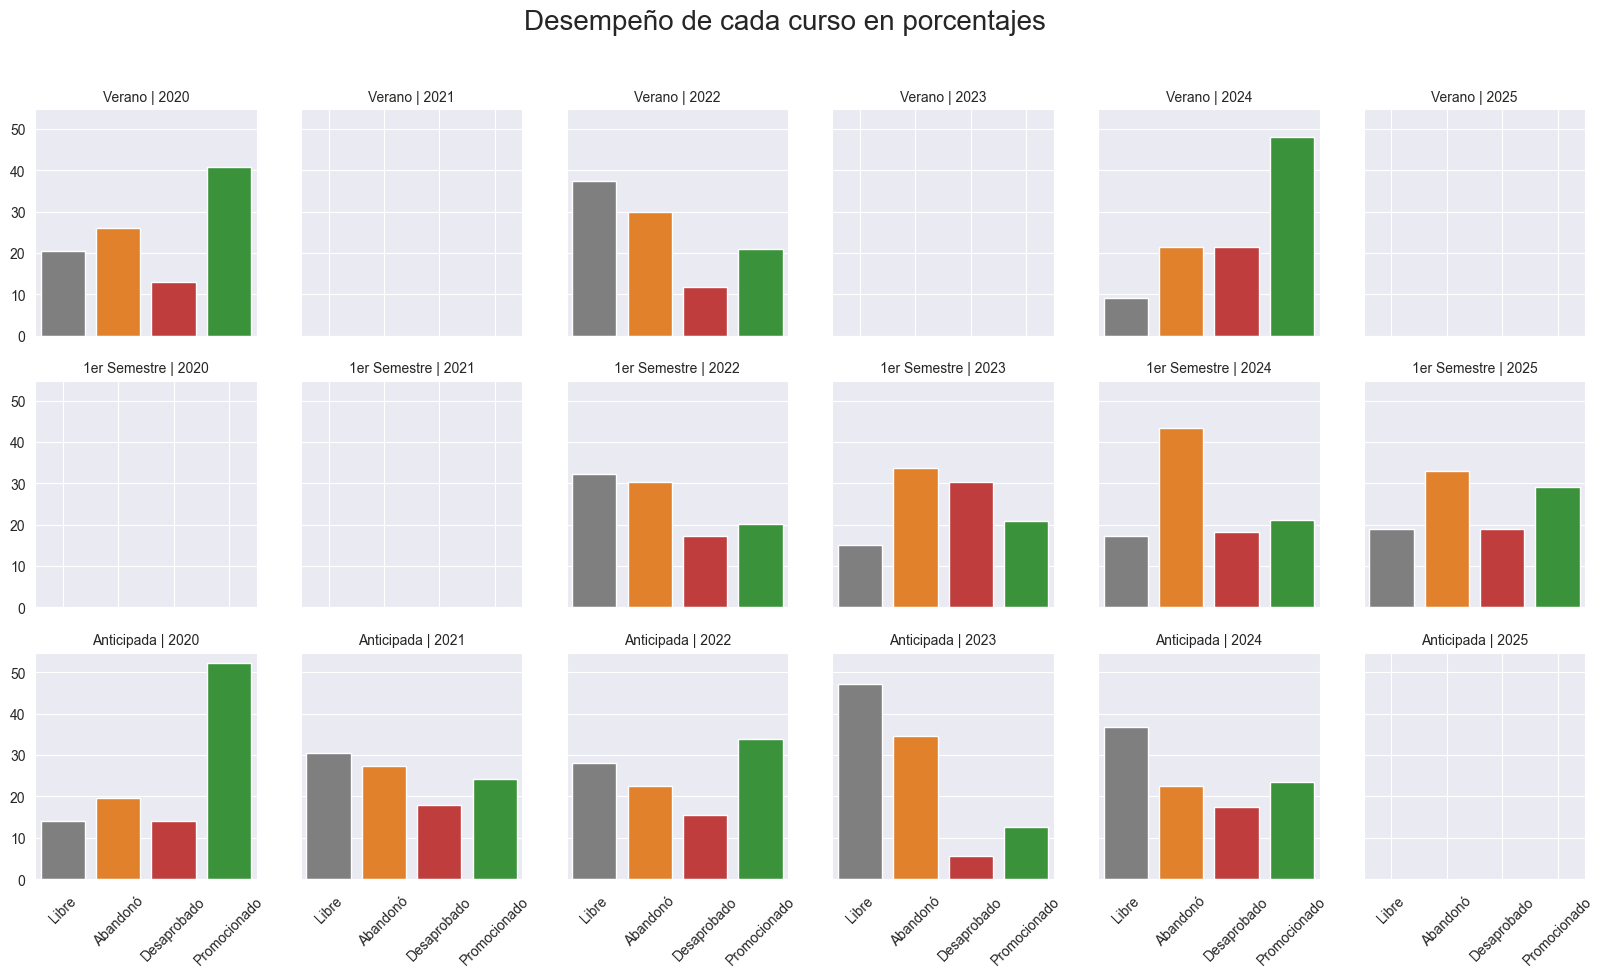

In [20]:
# Calculo los porcentajes de cada curso y los grafico:
ano_0 = mate_pi["Año"].min()
ano_f = mate_pi["Año"].max()
años = range(ano_0,ano_f+1,1)
cursadas = ["Verano", "1er Semestre", "Anticipada"]

fig, axs = plt.subplots(nrows = len(cursadas), ncols = len(años), figsize=(20,10), sharex=True, sharey=True)

for año in range(len(años)):
    for cursada in range(len(cursadas)):
        sns.countplot(
            data=filtered_data(mate_pi, años[año], cursadas[cursada]),
            x="Condicion",
            hue="Condicion",
            palette=colores_cond,
            #alpha=0.8,
            stat="percent",
            legend=False,
            ax=axs[cursada, año]
        )
        axs[cursada, año].set_title(f"{cursadas[cursada]} | {años[año]}", size=10)
        axs[cursada, año].tick_params(axis="x", size=7,rotation=45)
        axs[cursada, año].set_xlabel("")
        axs[cursada, año].set_ylabel("")

plt.suptitle("Desempeño de cada curso en porcentajes", fontsize=20)
plt.show()

En el gráfico anterior puede visualizarse el **desempeño de cada curso registrado en el dataset**. Podemos notar que **cada curso tiene sus particularidades**:

- **Durante el 2020 y el 2021, los cursos se vieron afectados por la pandemia de COVID**. Eso podría explicar la exagerada proporción de Promocionados en el curso de Anticipada 2020.
- Sólo se disponen de datos sobre 3 de los cursos del Verano, es un muestreo bajo como para detectar una tendencia.
- Los cursos disponibles de 1er Semestre parecen bastante regulares respecto a cantidad de Promocionados.
- De igual manera, podría detectarse alguna tendencia en los cursos de Anticipada, considerando lo dicho respecto al año 2020, y también teniendo en cuenta que el curso 2023 se trató de un turno nocturno que no volvió a dictarse por baja concurrencia.

## Distribución de datos por Nota Final

Habiendo analizado el desempeño general de los estudiantes del curso, **podemos realizar un perfil de los alumnos promocionados analizando las notas que obtuvieron al finalizar el curso**. Notemos que la materia se promociona necesariamente con nota mínima de 6: **no se consigna ninguna nota numérica a quienes no alcanzan la Promoción**. 

In [21]:
# Filtro según Nota Final:
finales = mate_pi[ mate_pi["Final"] >=6 ]
finales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 1 to 1219
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   1P1F          346 non-null    float64 
 1   1P2F          346 non-null    float64 
 2   2P1F          346 non-null    float64 
 3   2P2F          346 non-null    float64 
 4   F1            346 non-null    float64 
 5   F2            346 non-null    float64 
 6   Condicion     346 non-null    category
 7   Final         346 non-null    int64   
 8   Año           346 non-null    int64   
 9   Tipo_Cursada  346 non-null    category
 10  Virtual       346 non-null    int64   
 11  Oral          71 non-null     object  
 12  Grupo         43 non-null     object  
dtypes: category(2), float64(6), int64(3), object(2)
memory usage: 33.4+ KB


In [22]:
# Reviso que los datos sean consistentes con la Condicion:
finales["Condicion"].unique()

['Promocionado']
Categories (4, object): ['Libre' < 'Abandonó' < 'Desaprobado' < 'Promocionado']

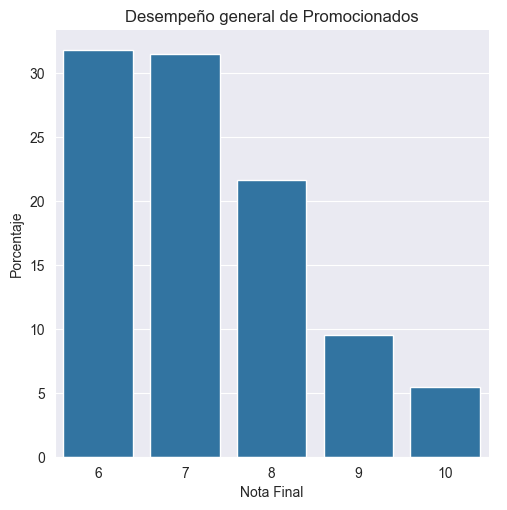

In [23]:
# Observo la distribución de notas finales:
sns.catplot(
    data=finales,
    x="Final",
    kind = "count",
    stat="percent"
)
plt.title("Desempeño general de Promocionados")
plt.ylabel("Porcentaje"),
plt.xlabel("Nota Final")
plt.show()

In [24]:
# Calculo magnitudes estadísticas: media, mediana, desviación estándar
finales[["Final"]].apply([np.mean, np.median, np.std])

,Final
mean,7.254335
median,7.000000
std,1.160051


Notamos que **la mayoría de los alumnos promocionan con notas entre 6 y 7**, siendo 7 la mediana estadística y 7,25 el valor promedio.

Es interesante también comparar el **desempeño de los alumnos promocionados según Tipo de Cursada**:

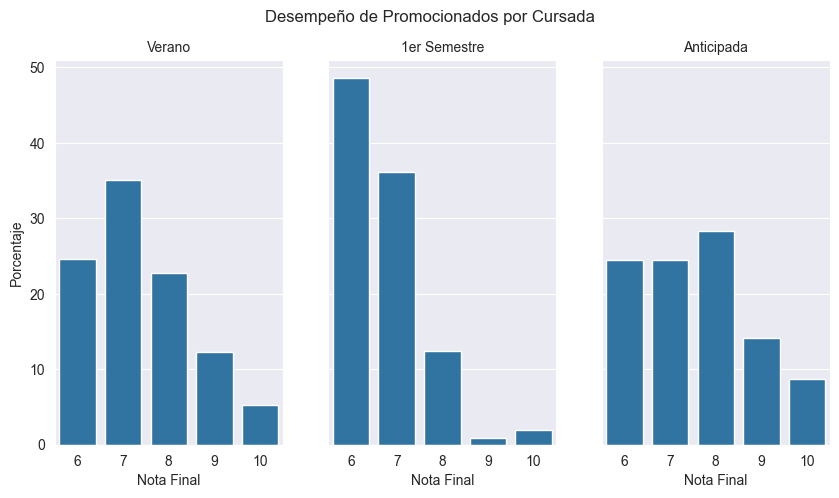

In [25]:
# Observo la distribución de notas finales separadas por Tipo_Cursada:

cursadas = ["Verano", "1er Semestre", "Anticipada"]

fig, axs = plt.subplots(ncols = len(cursadas), figsize=(10,5), sharex=True, sharey=True)

for cursada_i in range(len(cursadas)):
    sns.countplot(
        data=finales[ finales["Tipo_Cursada"] == cursadas[cursada_i]],
        x="Final",
        stat="percent",
        legend=False,
        ax=axs[cursada_i]
    )
    axs[cursada_i].set_title(f"{cursadas[cursada_i]}", size=10)
    axs[cursada_i].set_xlabel("Nota Final")
    axs[cursada_i].set_ylabel("Porcentaje")

plt.suptitle("Desempeño de Promocionados por Cursada")
plt.ylabel("Porcentaje")
plt.xlabel("Nota Final")
plt.show()

In [26]:
# Calculo magnitudes estadísticas por Tipo de Cursada:
pd.pivot_table(
    data=finales,
    index="Tipo_Cursada",
    values="Final",
    observed=False,
    aggfunc = ["mean", "median","std"]
)

,mean,median,std
,Final,Final,Final
Tipo_Cursada,,,
Verano,7.385965,7.0,1.140631
1er Semestre,6.714286,7.0,0.862847
Anticipada,7.582677,8.0,1.243657


Algunas conclusiones respecto al desempeño de los alumnos:

- **Todas las distribuciones presentan asimetría a la derecha**, la mayoría de los datos se acumulan por debajo del promedio.
- **La modalidad Anticipada muestra los mejores resultados**, con un promedio de notas de 7,58 y una mediana de 8. A su vez, presenta la mayor dispersión respecto al promedio, las notas altas (mayores que 8) son estadísticamente significativas.
- Similarmente, la modalidad Verano registra un promedio de notas de 7,39 y una mediana de 7. La asimetría en la distribución es más marcada que en el caso de la Anticipada.
- **La modalidad 1er Semestre muestra los peores resultados**, con un promedio de notas de 6,7 y una mediana de 7. La mayoría de los datos se acumulan entre las notas 6 y 7, las notas altas pueden considerarse valores atípicos en esta modalidad.

----------

En lo siguiente, **analizaremos cada Tipo de Cursada por separado**, incluyendo el análisis de los resultados en los parciales, buscando establecer un perfil de cada una.

# Análisis de resultados según Tipo de Cursada

Tras el estudio de distintas variables generales respecto al desempeño de los alumnos del curso, hemos notado que existen diferencias entre quienes cursan las distintas modalidades disponibles. Nos proponemos en lo siguiente establecer un perfil de los alumnos de cada Tipo de Cursada, a partir de los datos disponibles. **Nos enfocaremos en los siguientes aspectos**:

- **Distribución de alumnos por Condición**: Promocionados, Desaprobados, Abandonó, Libre. 
- **Permanencia**: en qué instancia se producen más abandonos.
- **Desempeño en Parciales**: proporción de aprobados, distribución de notas en cada fecha de parcial, cálculo de magnitudes estadísticas, comparación entre primera y segunda fecha de cada parcial, proporción de promocionados *antes* de la instancia de Flotante.
- **Desempeño en Flotantes**: proporción de promocionados en esa instancia, comparación de efectividad respecto a quienes recuperan Primer Parcial o Segundo Parcial.

Respecto a la modalidad Verano, consideramos que no se poseen datos suficientes como para realizar el estudio propuesto: se registraron sólo 3 años dentro del período analizado, y además en el año 2020 no se consignaron las notas numéricas de los parciales. Por lo tanto, **haremos el análisis únicamente para las modalidades 1er Semestre y Anticipada**.

In [28]:
# En construcción